In [1]:
import skimage
from skimage.io import imshow, imread, imsave
from skimage.transform import resize
import numpy as np

In [2]:
print("version of skimage: ", skimage.__version__)

version of skimage:  0.18.3


**Loading Grey Scale Images**

In [3]:
gray_image = imread('image_gray.png')

In [4]:
#shape of the gray image
gray_image.shape

(28, 28)

In [5]:
#checking the matrix of the image data
gray_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

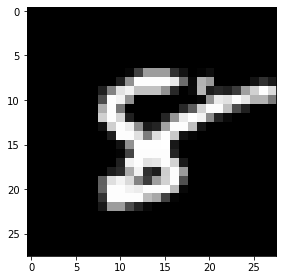

In [6]:
#displaying gray image
imshow(gray_image[:, :])

**Loading RGB image**

In [7]:
rgb_image = imread('dog.jpg')

In [8]:
#checking the shape of the rgb image
rgb_image.shape

(340, 453, 3)

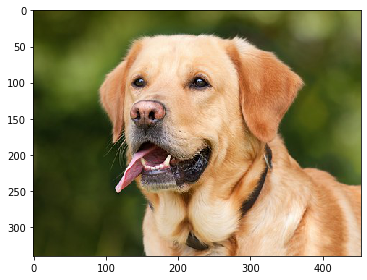

In [9]:
imshow(rgb_image)

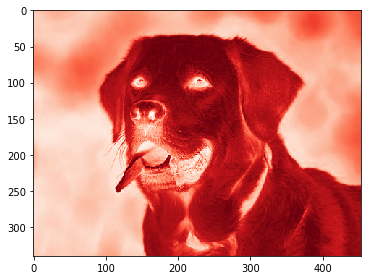

In [10]:
#printing only red channel
imshow(rgb_image[:, :, 0], cmap = 'Reds')

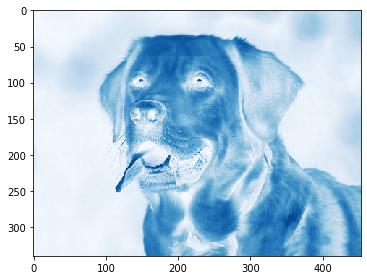

In [11]:
#printing only blue channel
imshow(rgb_image[:, :, 2], cmap = 'Blues')

**Loading RGBA image**

In [12]:
rgba_image = imread('mid_alpha.png')
rgba_image.shape

(340, 453, 4)

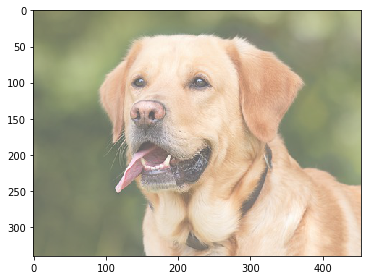

In [13]:
#showing the transparent image
imshow(rgba_image[:, :, :])

In [14]:
#checking the Alpha channel
rgba_image[:, :, 3]

array([[160, 160, 160, ..., 160, 160, 160],
       [160, 160, 160, ..., 160, 160, 160],
       [160, 160, 160, ..., 160, 160, 160],
       ...,
       [160, 160, 160, ..., 160, 160, 160],
       [160, 160, 160, ..., 160, 160, 160],
       [160, 160, 160, ..., 160, 160, 160]], dtype=uint8)

In [15]:
#changing the alpha value and checking the transperancy
rgba_image[:, :, 3] =  rgba_image[:, :, 3] + 60

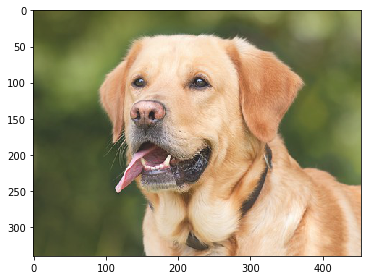

In [16]:
imshow(rgba_image)

The above image is much cleaner and sharper as compared to earlier

**Loading MRI image**

In [17]:
#importing necessary libraries
import nibabel as nib

In [18]:
#loading the image data
mri_image = nib.load('sM00223_002.hdr')
mri_image = mri_image.get_data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#checking the shape of the image data
mri_image.shape

(256, 256, 54, 1)

In [20]:
#since there is only one channel we can squeez the image
mri_image = mri_image.squeeze()
mri_image.shape

(256, 256, 54)

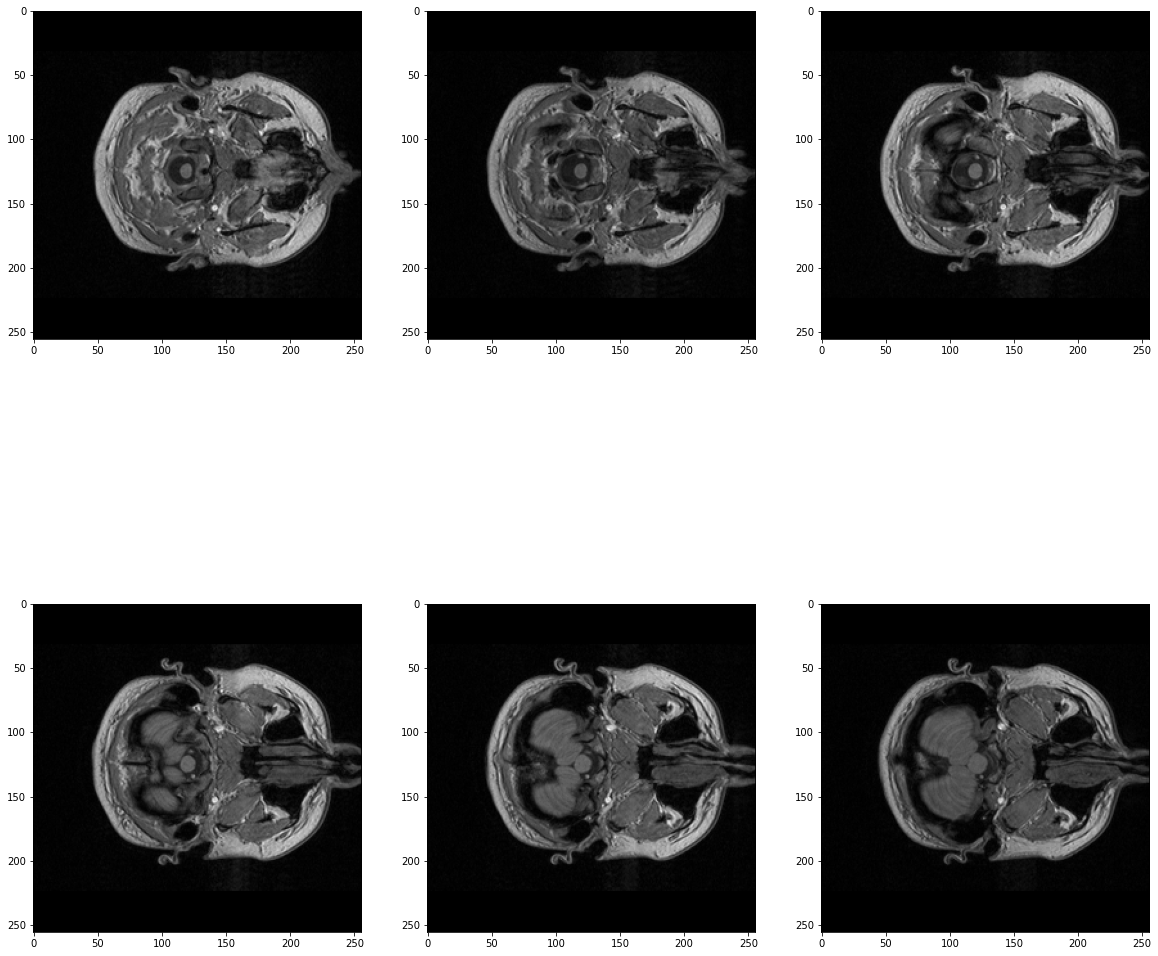

In [21]:
#showing different slices of the mri image
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 20))

ax[0, 0].imshow(mri_image[:, :, 0], cmap = 'gray')
ax[0, 1].imshow(mri_image[:, :, 1], cmap = 'gray')
ax[0, 2].imshow(mri_image[:, :, 2], cmap = 'gray')
ax[1, 0].imshow(mri_image[:, :, 3], cmap = 'gray')
ax[1, 1].imshow(mri_image[:, :, 4], cmap = 'gray')
ax[1, 2].imshow(mri_image[:, :, 5], cmap = 'gray')

**Loading multiple images**

In [22]:
#reading multiple images
from glob import glob
images = glob("*.jpg")

In [23]:
images

['beagle-dog.jpg', 'car-49278_960_720.jpg', 'dog_resized.jpg', 'dog.jpg']

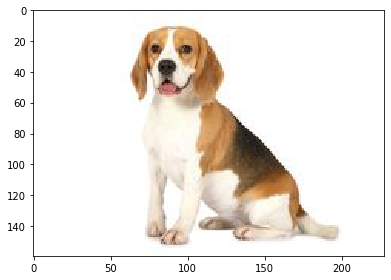

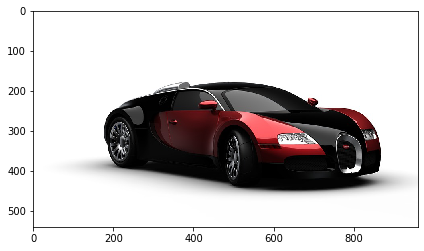

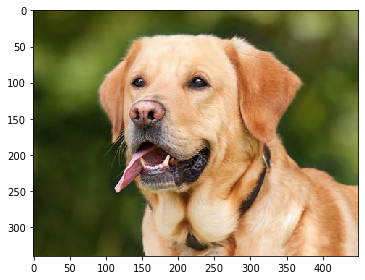

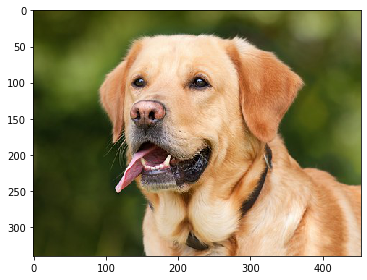

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [24]:
image = []
for im in images:
  read_image = imread(im)
  imshow(read_image)
  plt.show()
  image.append(read_image)

image = np.array(image)

In [25]:
#checking the shape of all the images
image[0].shape, image[1].shape, image[2].shape

((160, 228, 3), (540, 960, 3), (340, 450, 3))

Since all the images are of different shapes it is better to reshape them into same sizes

In [26]:
resized_images = []
for im in image:
  im = resize(im, (340, 450))
  resized_images.append(im)

resized_images = np.array(resized_images)

In [27]:
#the shape of all the images can be viewed once  
resized_images.shape

(4, 340, 450, 3)

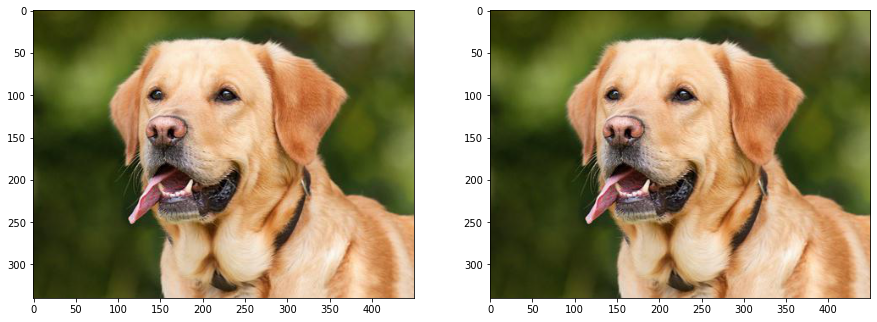

In [28]:
#comparing resized and original images
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 15) )

ax[0].imshow(image[2])
ax[1].imshow(resized_images[2])

In [29]:
#saving the resized image
imsave('dog_resized.jpg', resized_images[2])